# Predicting Car Prices

Our project involves analysis of the UCI dataset from 1985 Ward's Automotive Yearbook in order to establish a model to predict market price for a car with regard to its various attributes. The dataset includes various cars and technical information on them, like the weight of the car and the acceleration.

In order to predict the price of cars, we plan to use the machine-learning method, k-nearest neighbors algorithm.



In [25]:
# First, we import the libraries we will use:

import pandas as pd
import numpy as np

# Renaming the columns

columns = ['symboling', 'normalized_losses','make', 'fuel_type', 'aspiration', 'num_doors', 'body_style','drive_wheels',
           'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders',
           'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg',
           'price']

# Reading the dataset into pandas

cars = pd.read_csv("imports-85.data.csv", names = columns)
cars.head()
cars_data = cars.copy() # taking a copy of our dataset

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data Cleaning:

After previewing the dataset,We will kick off with some data cleaning. It seems that we have some missing values like in 'normalized_losses' column. We are going to examine all the numeric columns to make sure we don't have any missing values.

In [27]:
# Removing all missing data in the dataset:

cars = cars.replace("?", np.nan)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [44]:
# Dropping all non-numerical columns.
numerical_columns = ['normalized_losses', 'wheel_base','length', 'width', 'height', 'curb_weight',
                     'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
                     'city_mpg', 'highway_mpg', 'price']
numerical_cars = cars[numerical_columns]

# Setting the new numerical dataframe datatype as float, for easier handling.
numerical_cars = numerical_cars.astype(float)

# Exploring how many missing values do we have in all columns:
numerical_cars.isnull().sum()


normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

As we checked, we have many null values in different columns of the dataset. Firstly, we will remove the rows which have the price missing as its the value we intend to predict. For the rest of the columns,We will replace the missing values with the average value of the entire column.

In [48]:
# Removing any rows which have the price missing:
numerical_cars = numerical_cars.dropna(subset=['price'])
numerical_cars.isnull().sum()

# Replacing the missing values w/ mean of each column
numerical_cars = numerical_cars.fillna(numerical_cars.mean())

# Double check if we have any other missing values.
numerical_cars.isnull().sum()

numerical_cars.head(10)



,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
5,122.0,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0
6,158.0,105.8,192.7,71.4,55.7,2844.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,17710.0
7,122.0,105.8,192.7,71.4,55.7,2954.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0
8,158.0,105.8,192.7,71.4,55.9,3086.0,131.0,3.13,3.40,8.3,140.0,5500.0,17.0,20.0,23875.0
10,192.0,101.2,176.8,64.8,54.3,2395.0,108.0,3.50,2.80,8.8,101.0,5800.0,23.0,29.0,16430.0


In [49]:
# We will then noramlize every value of the dataset, except target column "price", to be between 0 and 1.
price_col = numerical_cars['price']
numerical_cars = (numerical_cars - numerical_cars.min())/(numerical_cars.max() - numerical_cars.min())
numerical_cars['price'] = price_col
numerical_cars.head()


,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# Model:

To begin predicting the prices, We will select the relevant features =. Then, we will use the optimal hyperparameter value for the selected features and evaluate the model's accuracy. 

We will start with some univariate K-nearest neighbors models.


In [93]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

numerical_cars.info()

# Creating knn_train_test() that encapsulates the training and simple validation process.
# We will solit the datset into training and test dataset
# based on the model fit and predictions, we will calculate the RMSE

def knn_train_test(train_col, target_col, df):
    # shuffling the rows of the dataset:
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    # Dividing the dataset for test/ train, we will divide it in half:
    midpoint_df = int(len(shuffled_df) / 2)
    
    # We will then assign the train/test sets:
    train_df = df.iloc[0:midpoint_df]
    test_df = df.iloc[midpoint_df:]
    
    #Initiating the model, using default k value:
    knn = KNeighborsRegressor()
    knn.fit(train_df[[train_col]], train_df[target_col]) # Fits the KNN model
    predictions = knn.predict(test_df[[train_col]])  # Makes predictions using model
    mse = mean_squared_error(test_df[[target_col]], predictions)
    rmse = mse ** (1/2)
    return rmse



<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  201 non-null    float64
 1   wheel_base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb_weight        201 non-null    float64
 6   engine_size        201 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression_ratio  201 non-null    float64
 10  horsepower         201 non-null    float64
 11  peak_rpm           201 non-null    float64
 12  city_mpg           201 non-null    float64
 13  highway_mpg        201 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 35.1 KB


We will try the model we initiated above by using every numerical column in the dataset as training column to predict the price.

In [149]:
# Droping the 'price' column from our training columns:
train_cols = numerical_cars.columns.drop('price')

# Dictionary for every rmse value against its column
rmse_results = {}

for col in train_cols:
    rmse_value = knn_train_test(col, 'price',numerical_cars)
    rmse_results[col] = rmse_value

# Converts rmse_results dict to series for easy handling:
rmse_results_series = pd.Series(rmse_results)

# printing the lowest rsme
print(rmse_results_series)




ValueError: Expected 2D array, got 1D array instead:
array=[0.29842932 0.29842932 0.29842932 0.51832461 0.51832461 0.29842932
 0.48691099 0.29842932 0.48691099 0.66492147 0.66492147 0.64397906
 0.64397906 0.29842932 0.29842932 0.29842932 0.29842932 0.29319372
 0.17277487 0.08376963 0.27748691 0.27748691 0.27748691 0.43455497
 0.43455497 0.43455497 0.43455497 0.23560209 0.41884817 0.37696335
 0.37696335 0.18848168 0.18848168 0.18848168 0.23560209 0.06806283
 0.21465969 0.21465969 0.10471204 0.10471204 0.10471204 0.21989529
 0.29842932 0.29842932 0.41884817 0.29842932 0.29842932 0.20418848
 0.20418848 0.20418848 0.2513089  0.2513089  0.44502618 0.44502618
 0.44502618 0.44502618 0.33507853 0.2617801  0.33507853 0.2617801
 0.29842932 0.2617801  0.27748691 0.29842932 0.14659686 0.14659686
 0.14659686 0.14659686 0.29842932 0.40314136 0.29842932 0.29842932
 0.29842932 0.5026178  0.5026178  0.5026178  0.5026178  0.46073298
 0.46073298 0.29842932 0.29842932 0.29842932 0.31413613 0.31413613
 0.31413613 0.37696335 0.32984293 0.32984293 0.32984293 0.29842932
 0.19895288 0.32984293 0.32984293 0.29842932 0.19895288 0.53926702
 0.21465969 0.21465969 0.32984293 0.22513089].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

As we examine the results, It seems the engine_size column performed the best under the default k value as it produced te least RSME. To investigate further, We will modify the knn_train_test() function to accept a parameter of k value. Our new k values are 1,3,5,7,9.

In [152]:
def knn_train_test(train_col, target_col, df):
    # shuffling the rows of the dataset:
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    # Dividing the dataset for test/ train, we will divide it in half:
    midpoint_df = int(len(shuffled_df) / 2)
    
    # We will then assign the train/test sets:
    train_df = df.iloc[0:midpoint_df]
    test_df = df.iloc[midpoint_df:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k) 
        knn.fit(train_df[[train_col]], train_df[target_col]) # Fits the KNN model
        predictions = knn.predict(test_df[[train_col]])  # Makes predictions using model
        mse = mean_squared_error(test_df[[target_col]], predictions)
        rmse = mse ** (1/2)
        
        k_rmses[k] = rmse # Assign the value of rmse to each k
        
    return k_rmses

# Droping the 'price' column from our training columns:
train_cols = numerical_cars.columns.drop('price')

# Dictionary for every rmse value against its column
k_rmse_results = {}

for col in train_cols:
    rmse_value = knn_train_test(col, 'price',numerical_cars)
    k_rmse_results[col] = rmse_value

# Converts rmse_results dict to series for easy handling:
# k_rmse_results_series = pd.Series(k_rmse_results)

# printing the lowest rsme
# print(k_rmse_results_series)

print(k_rmse_results)

    

{'normalized_losses': {1: 11628.904782718988, 3: 9578.793245190305, 5: 8131.436882072488, 7: 7441.814253467208, 9: 7644.0837748147915}, 'wheel_base': {1: 8052.050206913359, 3: 9171.153878561105, 5: 9969.243291700175, 7: 8938.808809133783, 9: 8637.3043859821}, 'length': {1: 10053.579063701594, 3: 8230.050248540974, 5: 8304.189346264562, 7: 8483.928913734228, 9: 7655.12304417215}, 'width': {1: 8044.1444455819, 3: 7234.558219432825, 5: 7110.412630045104, 7: 6621.848358316696, 9: 6531.417638109127}, 'height': {1: 13032.276289928392, 3: 11411.019683044135, 5: 10839.693635873846, 7: 10041.327943738908, 9: 9313.330965281266}, 'curb_weight': {1: 6566.749175404316, 3: 5635.184748392448, 5: 5166.828580646175, 7: 5239.631250704795, 9: 5244.5555635847895}, 'engine_size': {1: 5338.7918201602415, 3: 4698.501673022703, 5: 4190.43388788236, 7: 4114.571307788718, 9: 4056.629359658438}, 'bore': {1: 16502.858944335483, 3: 13895.11178798717, 5: 13397.091693481998, 7: 11075.156453540423, 9: 10178.905997122

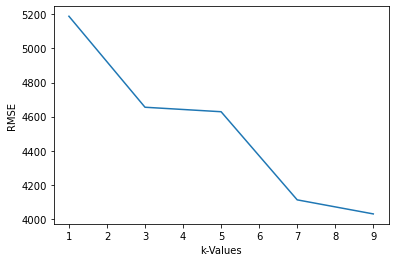

In [151]:
# Visualizing our results:
import matplotlib.pyplot as plt


for k,val in k_rmse_results.items():
    x = list(val.keys())
    y = list(val.values())
    
plt.plot(x,y)
plt.xlabel('k-Values')
plt.ylabel('RMSE')
plt.show()

As we observe the graph, it seems that as we increase the k-neighbors the better our model performs. The two best column performers for our model are highway_mpg and engine_size.